In [436]:
from ctypes import *
from ctypes.util import find_library
from os import path
import sys
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
windll.kernel32.GetModuleHandleW(0)
MyDllObject = ctypes.cdll.LoadLibrary("C:\\Users\\YixiangGao\\Desktop\\Nephele\\Deep Learning\\IC ML\\libsvm.dll")

<h2> 1. Download and Process the Data <h\2> 

Step 1: read the data into dataframe 

Step 2: Label the 'Sex' feature with numerical type: M: +1, F: 0, I: -1.

Step 3: Label y-value ('Rings') with binary classification: (Rings >= 9): 1,  (Rings < 9): -1

Step 4: Format the data in the way shown in "scale_heart" and make the feature data ready to get scaled  

In [563]:
# Step 1 

cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv('abalone.csv', names = cols)
cols_order = ['Rings','Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
df = df[cols_order]
df.head()

,Rings,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,15,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,7,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,9,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,10,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,7,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [564]:
# Step 2 & 3: 
sex_label = {'M': 1, "F": -1, "I": 0}

def label_sex(s):
    return sex_label[s]

def label_ring(r):
    if r >= 9:
        return 1
    else:
        return -1

df['Sex_label'] = df['Sex'].apply(lambda x: label_sex(x))
df['Rings_label'] = df['Rings'].apply(lambda x: label_ring(x))
df.head()

,Rings,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_label,Rings_label
0,15,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,1
1,7,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,-1
2,9,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,-1,1
3,10,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,1
4,7,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,-1


In [565]:
# Step 4:

col_order_2 = ['Rings_label','Sex_label', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
df_prescale =  df[col_order_2]
display(df_prescale.head())

,Rings_label,Sex_label,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,-1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,-1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [538]:
# Step 4 (cont')

format_str = [str(a) + ': {'+str(a)+'} ' for a in range(1,9)]
s = '{0} ' + ''.join(format_str)

s.format('Rings_label','Sex_label', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight')

'Rings_label 1: Sex_label 2: Length 3: Diameter 4: Height 5: Whole weight 6: Shucked weight 7: Viscera weight 8: Shell weight '

In [539]:
def format(row):
    rv = row.values
    return s.format(*tuple(rv))

# for example, the first 3 rows of the df:
df_prescale.iloc[0:3].apply(lambda x: format(x), axis = 1)

0    1.0 1: 1.0 2: 0.455 3: 0.365 4: 0.095 5: 0.514...
1    -1.0 1: 1.0 2: 0.35 3: 0.265 4: 0.09 5: 0.2255...
2    1.0 1: -1.0 2: 0.53 3: 0.42 4: 0.135 5: 0.677 ...
dtype: object

In [540]:
# train-test split 
train_df = df_prescale.iloc[:3133]
test_df = df_prescale.iloc[3133:]

In [543]:
train_txt = train_df.apply(lambda x: format(x), axis = 1)
np.savetxt('train.data', train_txt.values, fmt='%s')
test_txt = test_df.apply(lambda x: format(x), axis = 1)
np.savetxt('test.data', test_txt.values, fmt='%s')

In [547]:
train_scaled, test_scaled = pd.read_csv('train_scaled.data'), pd.read_csv('test_scaled.data')

In [374]:
y, X = svm_read_problem('train_scaled.data')

In [548]:
cv_acc = pd.DataFrame(columns = ['d=1', 'd=2', 'd=3', 'd=4'], index = [i for i in range(-10,11)])
cv_acc.index.name = 'C'

In [549]:
cv_acc.head()

,d=1,d=2,d=3,d=4
C,,,,
-10,NaN,NaN,NaN,NaN
-9,NaN,NaN,NaN,NaN
-8,NaN,NaN,NaN,NaN
-7,NaN,NaN,NaN,NaN
-6,NaN,NaN,NaN,NaN


In [550]:
d_list = [1,2,3,4]
c_list = [2**(i) for i in range(-10,11)]

for i in range(4):
    result = []
    d = i+1
    for c in range(-10,11):
        result.append(svm_train(y, X, '-t 1 -d '+str(d) +' -c '+str(2**(c)) +' -v 10'))
    cv_acc.iloc[:,i] = result

Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.7836%
Cross Validation Accuracy = 78.4552%
Cross Validation Accuracy = 80.6575%
Cross Validation Accuracy = 81.232%
Cross Validation Accuracy = 80.9767%
Cross Validation Accuracy = 81.264%
Cross Validation Accuracy = 81.6789%
Cross Validation Accuracy = 82.1258%
Cross Validation Accuracy = 82.5407%
Cross Validation Accuracy = 83.2429%
Cross Validation Accuracy = 83.3387%
Cross Validation Accuracy = 83.3706%
Cross Validation Accuracy = 83.3706%
Cross Validation Accuracy = 83.4025%
Cross Validation Accuracy = 83.3067%
Cross Validation Accuracy = 83.4344%
Cross Validation Accuracy = 83.3067%
Cross Validation Accuracy = 83.3706%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.6559%
Cross Validation Accuracy = 65.7198%
Cross Validation Accuracy = 76.6677%
Cross Validation Accuracy = 80.4022%
Cro

In [551]:
# calculate the cv-errors:

cv_err = cv_acc.transform(lambda x: 1-x/100)
cv_err.head()

,d=1,d=2,d=3,d=4
C,,,,
-10,0.343441,0.343441,0.343441,0.343441
-9,0.343441,0.343441,0.343441,0.343441
-8,0.343441,0.343441,0.343441,0.343441
-7,0.342164,0.342802,0.343441,0.343441
-6,0.215448,0.233323,0.306416,0.342802


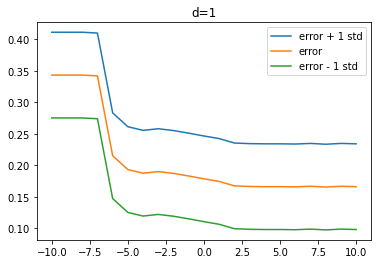

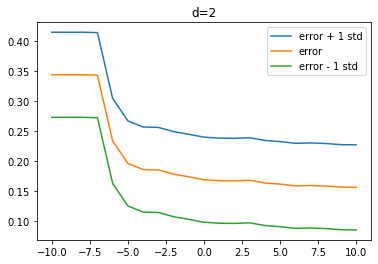

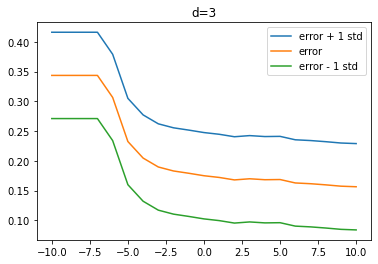

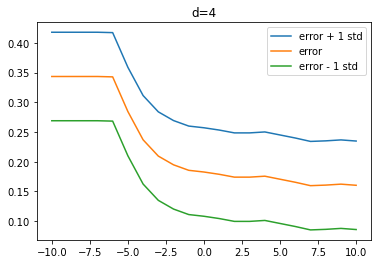

In [552]:
for i in range(4):
    std = cv_err.iloc[:,i].std()
    plt.plot(cv_err.index, cv_err.iloc[:,i] + std)
    plt.plot(cv_err.index, cv_err.iloc[:,i])
    plt.plot(cv_err.index, cv_err.iloc[:,i] - std)
    
    plt.legend(['error + 1 std', 'error','error - 1 std'])
    plt.title('d='+str(i+1))
    plt.show()

In [553]:
# locate the global min
print('global min is: ')
(cv_err.min(axis=1).idxmin(), cv_err.min().idxmin())

global min is: 


(10, 'd=2')

In [554]:
model = svm_train(y, X, '-t 1 -d 2 -c 1024')

In [555]:
model

In [556]:
svm_save_model('model.data', model)
print('From the data file, the total number of support vector is 1287')

From the data file, the total number of support vector is 1287


In [557]:
y_t, X_t = svm_read_problem('test_scaled.data')
s = svm_predict(y_t, X_t, model)
s[0][0]

Accuracy = 61.3985% (641/1044) (classification)


1.0

In [558]:
plot_y_1 = cv_err.loc[10]
plot_y_2 = []

for i in range(4):
    d = i+1
    model = svm_train(y, X, '-t 1 -d '+str(d) +' -c 1024')
    test_err = svm_predict(y_t, X_t, model)
    plot_y_2.append(1 - test_err[1][0]/100)

Accuracy = 74.0421% (773/1044) (classification)
Accuracy = 61.3985% (641/1044) (classification)
Accuracy = 71.5517% (747/1044) (classification)
Accuracy = 46.6475% (487/1044) (classification)


In [568]:
plot_y_2

[0.25957854406130265,
 0.3860153256704981,
 0.2844827586206897,
 0.5335249042145593]

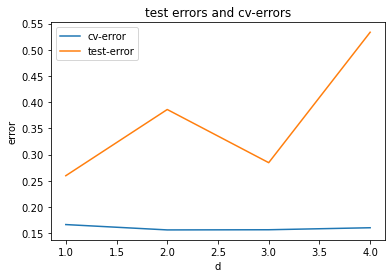

In [559]:
plt.plot([1,2,3,4], plot_y_1)
plt.plot([1,2,3,4], plot_y_2)
plt.title('test errors and cv-errors')
plt.legend(['cv-error','test-error'])
plt.xlabel('d')
plt.ylabel('error')
plt.show()

In [578]:
da = pd.read_excel('d=1.xlsx')
da['nSV']

0    1105
1    1126
2    1151
3    1124
4    1118
5    1122
6    1111
7    1127
8    1124
9    1112
Name: nSV, dtype: int64

In [579]:
nSV = []
nBSV = []
for i in range(1,5):

    file_name = 'd='+str(i)+'.xlsx'
    data = pd.read_excel(file_name)
    nSV.append(data['nSV'].mean())
    nBSV.append(data['nBSV'].mean())

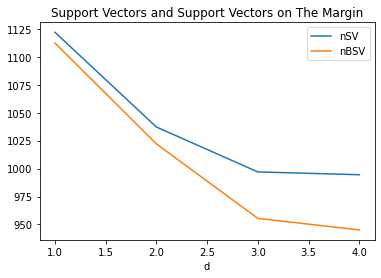

In [581]:
plt.plot([1,2,3,4], nSV)
plt.plot([1,2,3,4], nBSV)
plt.title('Support Vectors and Support Vectors on The Margin')
plt.legend(['nSV','nBSV'])
plt.xlabel('d')
plt.show()